In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

In [3]:
#Load dataset
df=pd.read_csv("drive/My Drive/Colab Notebooks/Dataset/House_Rent_Dataset--.csv")
df.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-22,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-22,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-22,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-22,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-22,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.shape

(4746, 12)

In [5]:
#Data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [8]:
#Check unique value for each feature for more understanding


for col in list(df.columns):
    print(f'{col}, Unique value = {len(df[col].unique())}')
    print(f'{df[col].unique()} \n')

Posted On, Unique value = 81
['18-05-22' '13-05-22' '16-05-22' '04-07-22' '09-05-22' '29-04-22'
 '21-06-22' '07-06-22' '20-06-22' '23-05-22' '14-05-22' '05-05-22'
 '01-06-22' '17-05-22' '09-06-22' '02-07-22' '14-06-22' '15-06-22'
 '28-05-22' '22-05-22' '18-06-22' '25-06-22' '22-06-22' '21-05-22'
 '26-06-22' '16-06-22' '29-06-22' '10-05-22' '12-05-22' '03-06-22'
 '31-05-22' '10-06-22' '24-06-22' '30-04-22' '27-05-22' '06-06-22'
 '20-05-22' '26-05-22' '03-07-22' '23-04-22' '19-06-22' '06-07-22'
 '04-06-22' '30-05-22' '08-06-22' '03-05-22' '07-05-22' '27-06-22'
 '15-05-22' '28-04-22' '28-06-22' '23-06-22' '13-06-22' '04-05-22'
 '25-04-22' '06-05-22' '30-06-22' '01-07-22' '17-06-22' '11-06-22'
 '11-05-22' '12-06-22' '05-06-22' '25-05-22' '24-05-22' '19-05-22'
 '24-04-22' '27-04-22' '08-05-22' '26-04-22' '02-06-22' '29-05-22'
 '07-07-22' '08-07-22' '09-07-22' '05-07-22' '01-05-22' '13-04-22'
 '02-05-22' '10-07-22' '11-07-22'] 

BHK, Unique value = 6
[2 1 3 6 4 5] 

Rent, Unique value = 243


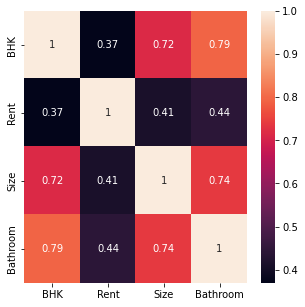

In [9]:
#EDA
#Heatmap

plt.figure(figsize=(5,5))
sns.heatmap(data=df.corr(), annot=True)

In [10]:
#EDA
df.describe().applymap(lambda x: f"{x:0.2f}")

,BHK,Rent,Size,Bathroom
count,4746.00,4746.00,4746.00,4746.00
mean,2.08,34993.45,967.49,1.97
std,0.83,78106.41,634.20,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


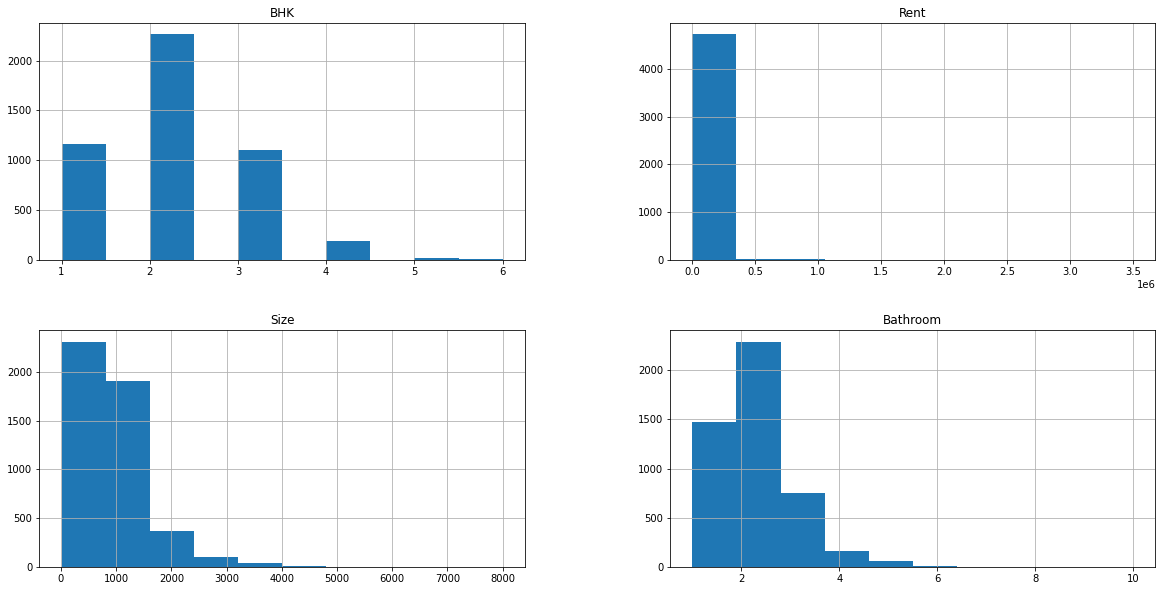

In [11]:
#EDA
#Only numerical features

plt.rcParams["figure.figsize"] = (20,10)
df.hist();

In [12]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

#prevent Nan too much error
df.fillna(999, inplace=True)

X = df.drop(['Rent','Posted On'], axis='columns')
y= df['Rent']

#built selector
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)



from sklearn.preprocessing import OrdinalEncoder, StandardScaler,OneHotEncoder


categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1)
numerical_preprocessor = StandardScaler()

#create transformers

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('Ordinalencoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

#built model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline



model = make_pipeline(preprocessor, RandomForestRegressor())

#splitting data into train and test sets.
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    X, y, random_state=42)

#train model

model.fit(data_train, target_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Floor', 'Area Type',
                                                   'Area Locality', 'City',
                                                   'Furnishing Status',
                                                   'Tenant Preferred',
                                                   'Point of Contact']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['BHK', 'Size',
                                                   'Bathroom'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [13]:
# evaluation 
target_predicted = model.predict(data_test)



print('Result from pre-process numerical by normalize')
print('MAE on Validation set :',metrics.mean_absolute_error(target_test, target_predicted))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(target_test, target_predicted))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(target_test, target_predicted)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(target_test, target_predicted))
print("\n")


Result from pre-process numerical by normalize
MAE on Validation set : 16315.691109238975


MSE on Validation set : 5358548430.765421


RMSE on Validation set : 127.73288969266676


R2 Score on Validation set : -0.4084438075037191


